<a href="https://colab.research.google.com/github/Sujitharasamsetty/Exploratory-Data-Analysis-On-Global-Terrorism-/blob/main/Exploratory_Data_Analysis_On_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [17]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin =1')

data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,13,14,15,16,19,20,21,22,31,33,53,55,60,61,62,63,65,67,76,79,80,94,96,112,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182487,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
182488,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9.0,-9.0,1.0,1.0,NaN
182489,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0.0,0.0,0.0,0.0,NaN
182490,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


In [18]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


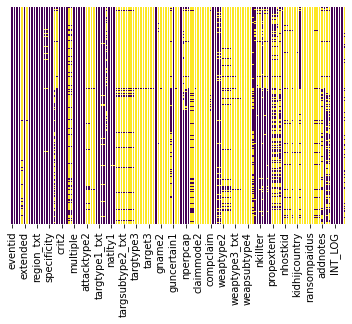

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182492 entries, 0 to 182491
Columns: 135 entries, eventid to related
dtypes: float64(58), int64(7), object(70)
memory usage: 188.0+ MB


In [23]:
# Information for the data

data.describe()

,eventid,iyear,imonth,iday,extended,country,region,alternative,multiple,success,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.824920e+05,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,29033.000000,182489.000000,182490.000000,...,1.352000e+03,5.650000e+02,7.760000e+02,554.000000,11060.000000,10461.000000,182490.000000,182490.000000,182490.00000,182490.000000
mean,2.002733e+11,2002.666917,6.447800,15.504197,0.045394,131.905064,7.162462,1.300796,0.137351,0.889835,...,3.167855e+06,5.764388e+05,7.160931e+05,239.510830,4.631013,-29.005544,-4.549816,-4.470782,0.08926,-3.953537
std,1.323703e+09,13.236980,3.393933,8.809336,0.208167,112.268944,2.930945,1.443409,0.344218,0.313096,...,3.018945e+07,7.065447e+06,1.013089e+07,2935.679735,2.036274,65.618022,4.543414,4.636829,0.57218,4.691613
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.00000,-9.000000
25%,1.991022e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.00000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,0.000000,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.00000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,0.000000,1.000000,...,4.000000e+05,0.000000e+00,1.220238e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,216.000000,1.000000,1.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.00000,1.000000


In [24]:
# Corelation between different Entity

data.corr()

,eventid,iyear,imonth,iday,extended,country,region,alternative,multiple,success,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,-0.000032,0.018217,0.091577,-0.135118,0.400873,0.022524,0.093001,-0.082464,...,-0.010110,-0.017895,-0.014149,-0.165281,0.255266,-0.181361,-0.143842,-0.133545,-0.077737,-0.175877
iyear,0.999996,1.000000,-0.002607,0.018136,0.091570,-0.135103,0.400885,0.022549,0.093012,-0.082451,...,-0.010104,-0.018112,-0.014293,-0.165238,0.255248,-0.181306,-0.143845,-0.133549,-0.077736,-0.175872
imonth,-0.000032,-0.002607,1.000000,0.005230,-0.000920,-0.005546,-0.003668,-0.011326,-0.002826,-0.003763,...,-0.000515,0.047220,0.058980,-0.016131,0.010079,-0.011417,-0.000547,-0.000232,-0.000821,-0.004193
iday,0.018217,0.018136,0.005230,1.000000,-0.004213,0.003395,0.009601,-0.000742,-0.000131,-0.011984,...,0.012789,-0.010375,0.003203,-0.006457,-0.006069,0.001560,-0.001349,-0.001420,-0.001868,-0.001013
extended,0.091577,0.091570,-0.000920,-0.004213,1.000000,-0.020426,0.038037,0.046330,-0.013445,0.073197,...,-0.008046,0.028332,0.002130,0.009665,0.231158,-0.191387,0.072079,0.075437,0.027446,0.081049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181361,-0.181306,-0.011417,0.001560,-0.191387,-0.044210,-0.149220,0.062930,-0.085584,-0.019883,...,0.054518,0.034704,0.049232,0.016712,-0.554486,1.000000,0.040392,0.042126,0.085492,0.065157
INT_LOG,-0.143842,-0.143845,-0.000547,-0.001349,0.072079,0.069877,-0.083295,-0.176765,0.124533,0.059729,...,0.035815,0.031085,0.007066,-0.045297,-0.016271,0.040392,1.000000,0.996213,0.053089,0.891274
INT_IDEO,-0.133545,-0.133549,-0.000232,-0.001420,0.075437,0.067553,-0.072673,-0.177353,0.126230,0.059032,...,0.039052,0.041977,0.013194,-0.039646,-0.017346,0.042126,0.996213,1.000000,0.082439,0.894035
INT_MISC,-0.077737,-0.077736,-0.000821,-0.001868,0.027446,0.205906,0.042692,-0.028295,-0.026357,-0.014607,...,0.023764,0.124716,0.037133,0.128803,-0.120348,0.085492,0.053089,0.082439,1.000000,0.251240


In [25]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

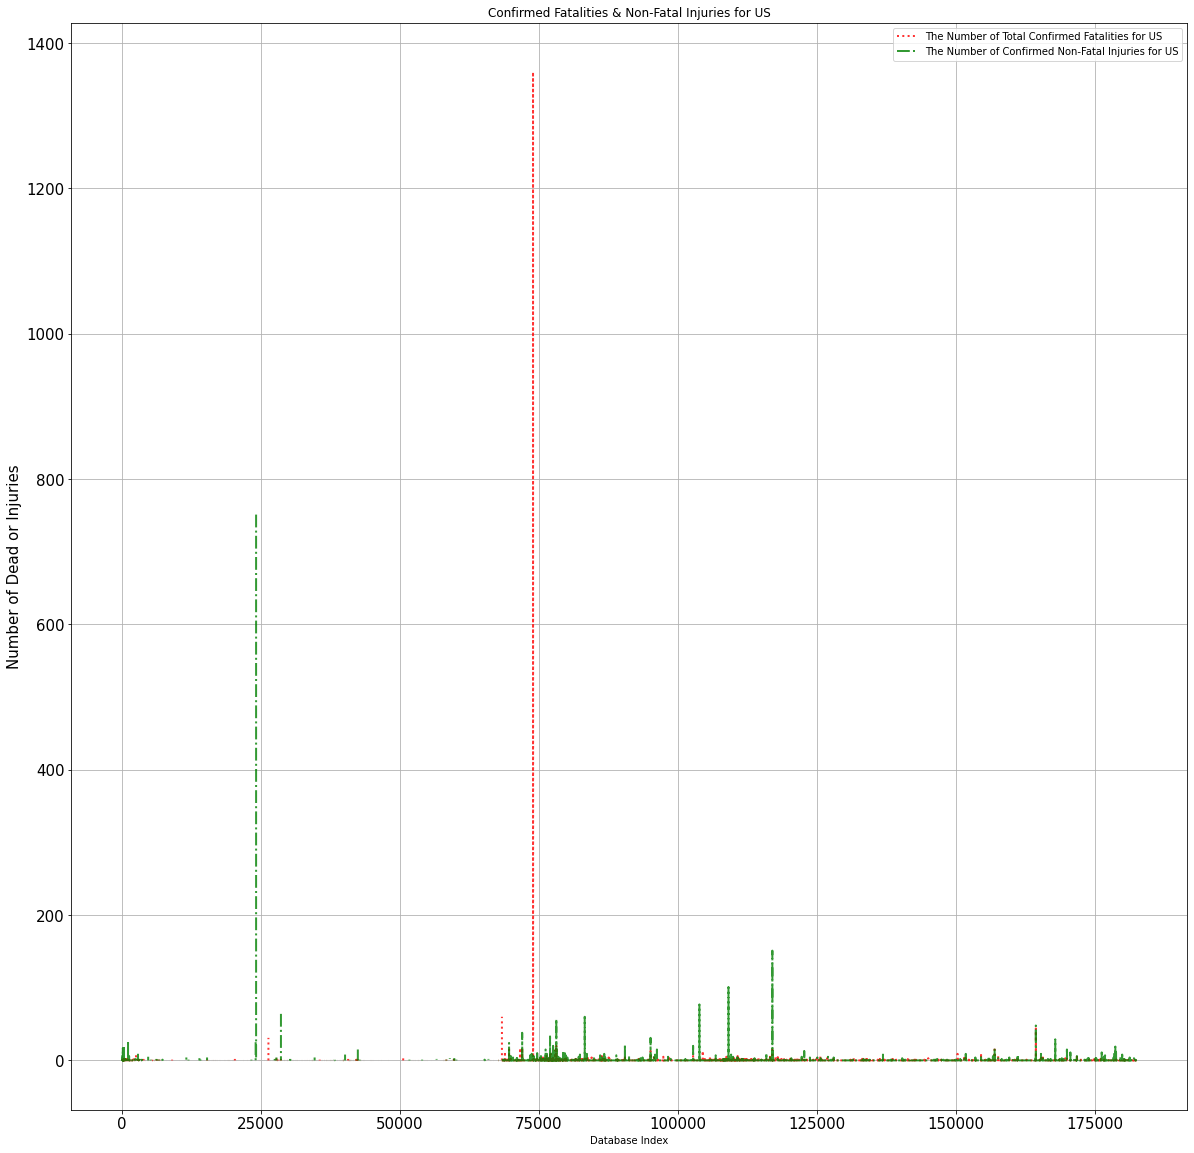

In [26]:
#US TERRORISM ATTACKS AND DEATH INJURIES

data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

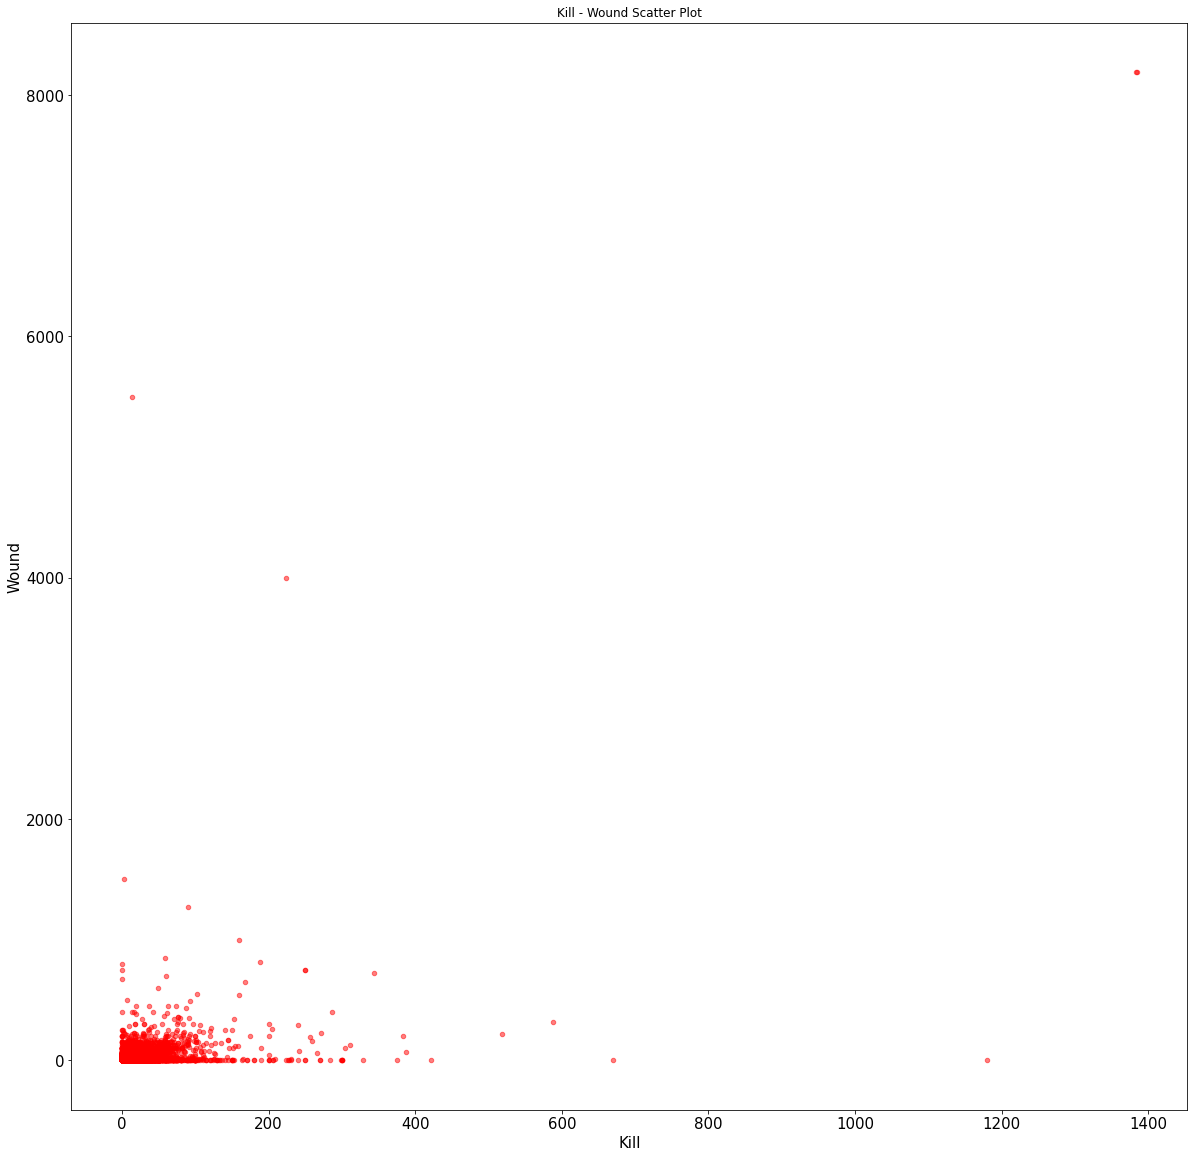

In [27]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

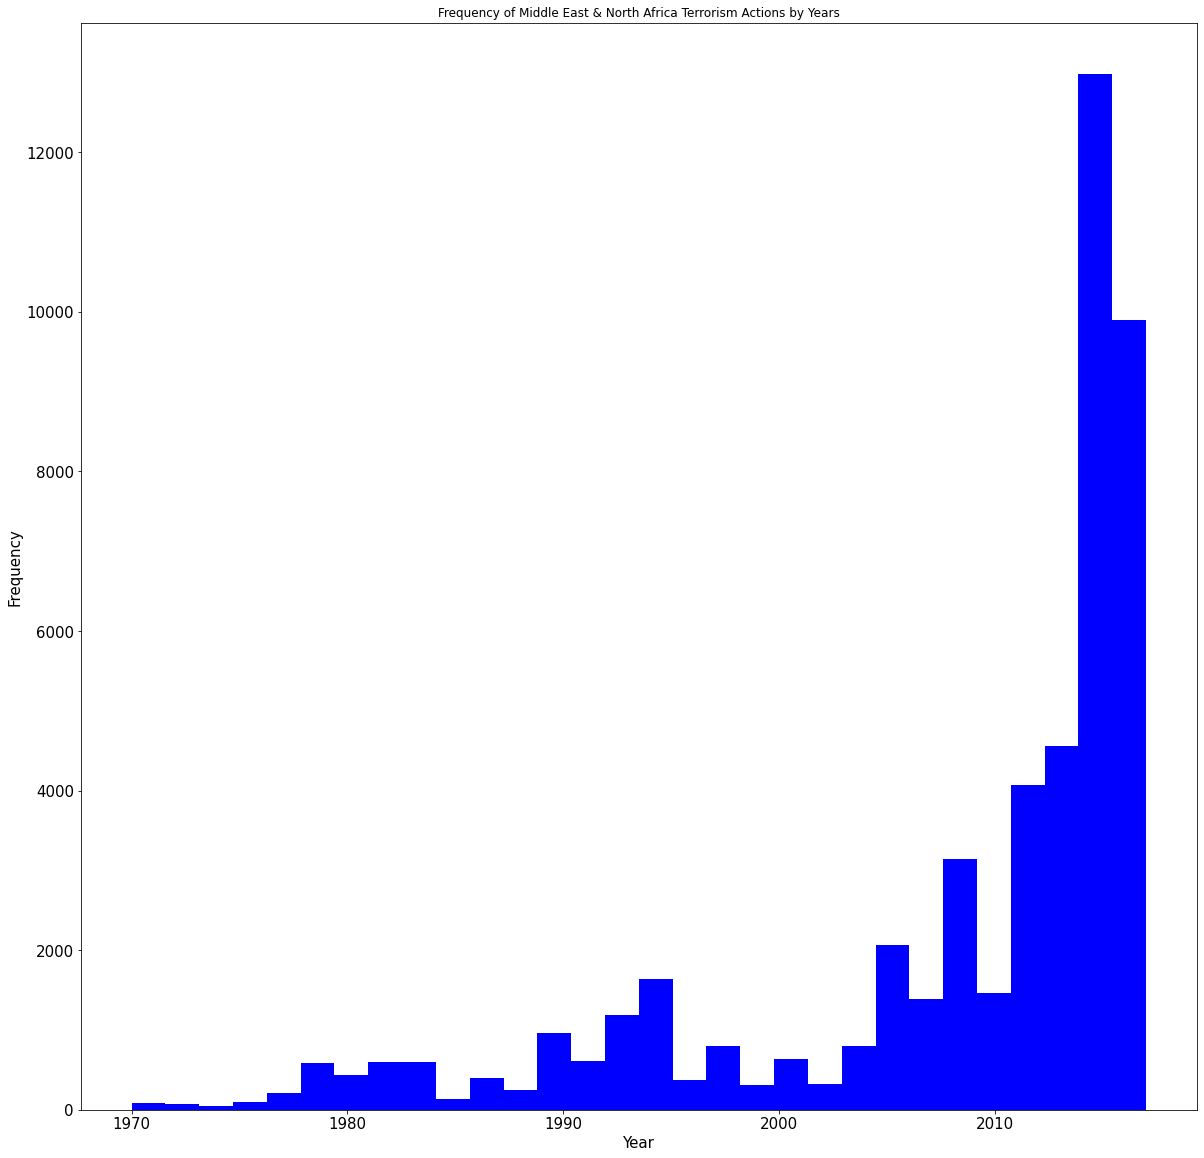

In [28]:
# Analysing Terrosist Attacks in the Middle East and North Africa

middleEastData = data[data['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'blue', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()


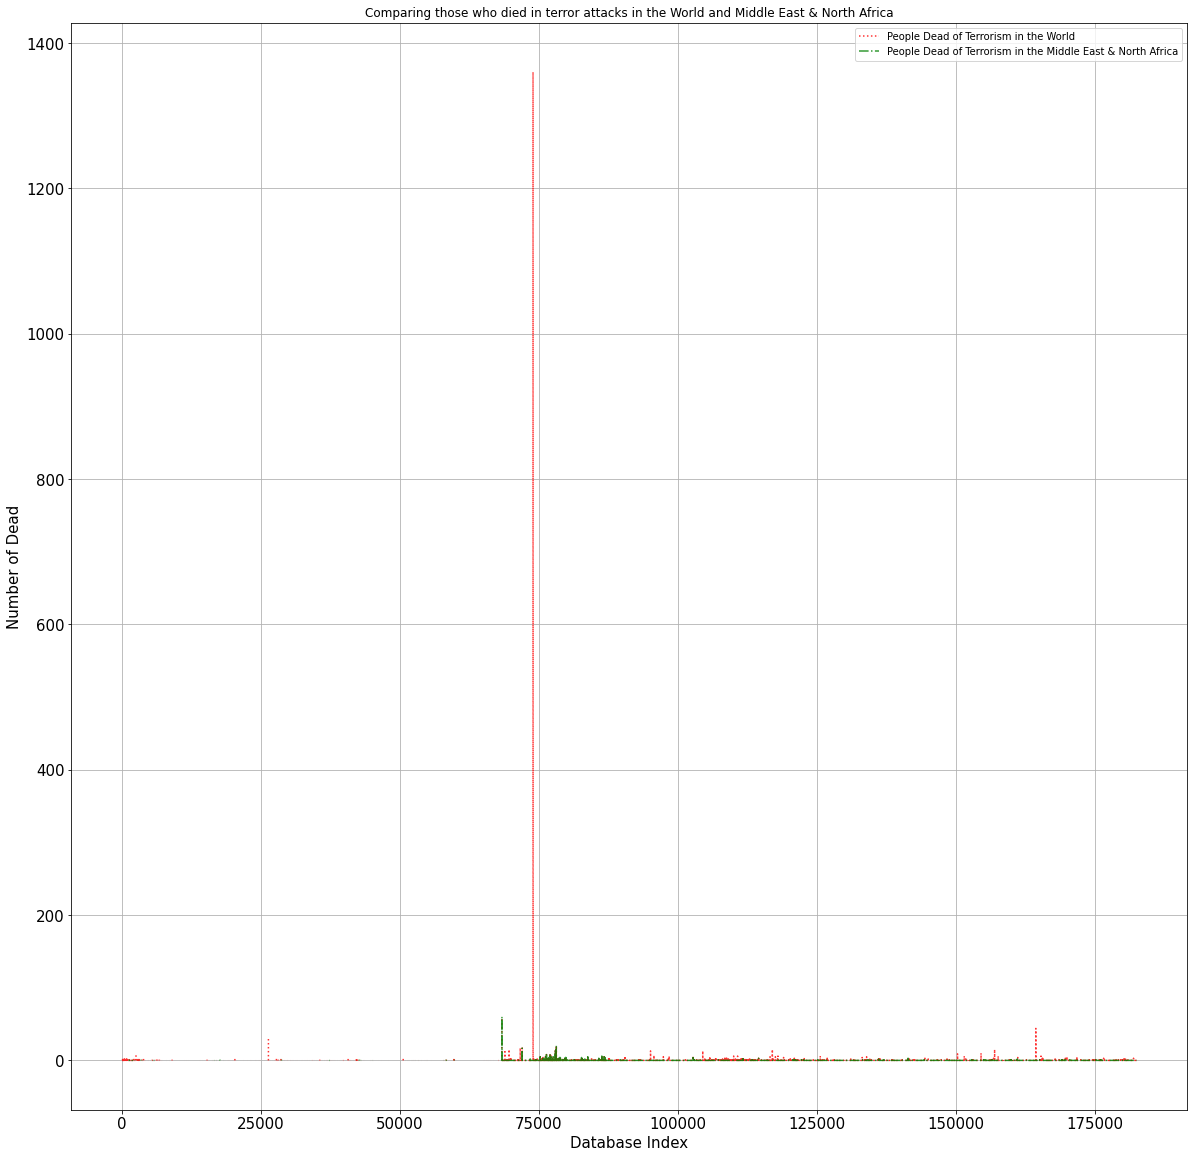

In [29]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

In [30]:
filterYear = data['iyear'] == 1970

In [31]:
#Filter Data
filterData = data[filterYear] 
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] # Here We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [33]:
#Marker Clusters
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map